## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [ ]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [ ]:
#answer below:
lager = lager.drop(columns=['beer'])
lager.head()


Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [ ]:
# answer below:
from sklearn.model_selection import train_test_split

X = lager[['asa', 'ma', 'dsa', 'orac', 'rp', 'mca']]
y = lager['tpc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Next, we'll generate a linear model and make a residual vs. fit (homoscedasticity) plot. All Gauss-Markov assumptions should be evaluated on the training set.

How much heteroscedasticity is exhibited in the model?

In [ ]:
#answer below:
from sklearn import linear_model
lmr = linear_model.LinearRegression()

lmr.fit(X_train, y_train)

predictions = lmr.predict(X_train)

In [ ]:
X_train

,asa,ma,dsa,orac,rp,mca
12,1.32,11.70,0.42,1.02,0.60,35.83
32,1.10,10.80,0.48,3.09,0.61,18.38
23,1.28,12.51,0.49,3.77,0.66,18.99
24,1.56,14.13,0.58,0.47,0.71,33.54
10,1.46,9.14,0.53,2.01,0.62,20.55
6,1.45,8.27,0.58,5.82,0.68,26.09
8,2.23,9.06,0.59,2.50,0.65,6.39
33,1.83,11.03,0.96,8.41,1.00,31.24
3,1.01,9.65,0.90,3.34,0.50,76.65
14,1.21,1.64,0.42,3.24,0.59,11.98


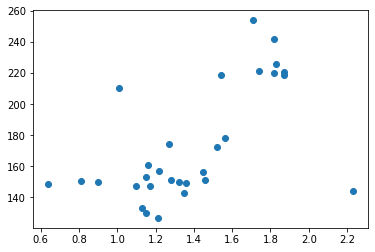

In [ ]:
plt.scatter(X_train.iloc[:,0], predictions)

In [ ]:
errors = y_train - predictions

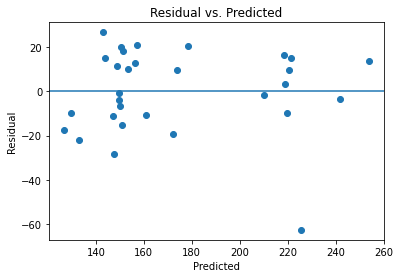

In [ ]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Compute the VIF for all features in the model. You will need to add a constant to your data (make a new copy just for this) to compute this with statsmodels.

How collinear are your features?

In [ ]:
# answer below:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(lager[['asa', 'ma', 'dsa', 'orac', 'rp', 'mca']])

In [ ]:
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])], index= X.columns)

const    25.231110
asa       1.824640
ma        1.408874
dsa       2.752283
orac      1.631315
rp        2.357123
mca       1.485338
dtype: float64

Show a histogram of your error, and then plot the qq-plot for our errors (make sure to use a standardized line to compare them appropriately to the standard distribution.)

Remember to use training data.

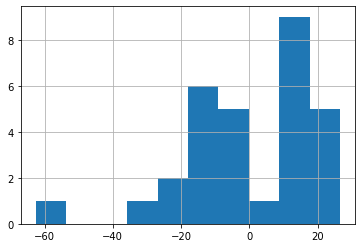

In [ ]:
# answer below:
errors.hist()


In [ ]:
# answer below:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))


<function matplotlib.pyplot.show>

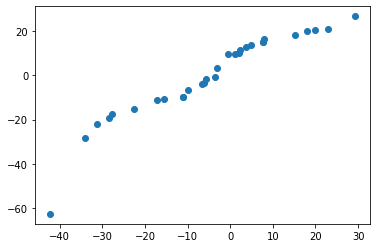

In [ ]:
plt.scatter(np.sort(rand_nums), np.sort(errors))
plt.show

Plot the actual test data against test predictions to see how well your model predicts new data.

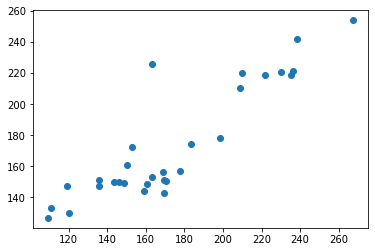

In [ ]:
# answer below:
plt.scatter(y_train, predictions)
plt.show()